<a href="https://colab.research.google.com/github/eweaverdyck/Eniac_discounts/blob/main/Master_Notebook_Cleaning_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and data

In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

In [186]:

def gd_path(file_id):
  return f"https://drive.google.com/uc?export=download&id={file_id}"

files_url = {
  'products': 'https://drive.google.com/file/d/1GunIkVAoiuMtaNu1P9o_7CD9FftKrHnD/view?usp=drive_link',
  'orders': 'https://drive.google.com/file/d/1KOE7AjAQB2GX35r03C_NIpkD2-7Op7-N/view?usp=drive_link',
  'orderlines': 'https://drive.google.com/file/d/1yJGjeVCKNDlwLbPKphM1UCRvsVr5ZXCE/view?usp=drive_link',
  'brands': 'https://drive.google.com/file/d/1eSEtFzNr_Jj2GBNmh6wFizn1lUWH0Py1/view?usp=drive_link'    
}

files_id = {csv:url.split('/')[-2] for csv, url in files_url.items()}

products = pd.read_csv(gd_path(files_id['products']), sep = ',')
orders = pd.read_csv(gd_path(files_id['orders']), sep = ',')
orderlines = pd.read_csv(gd_path(files_id['orderlines']), sep = ',')
brands = pd.read_csv(gd_path(files_id['brands']), sep = ',')

# Data cleaning

## Products

In [188]:
products.info()
#main steps to take in order to clean the table:
#1.price and promo_price have to change to float 
#2.there is also missing data in the desc and in the price and type as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [189]:
# Drop duplicates
products_clean = products.drop_duplicates(subset='sku',inplace=False,ignore_index=True).copy()

# Drop NA
products_clean.dropna(how = 'any', inplace = True)

# Drop records in which the price contains two dots
products_clean = products_clean.loc[~products_clean.price.str.contains('\d+\.\d+\.\d+')].copy()

# Drop records in which the price contains three digits after the dot
products_clean = products_clean.loc[~products_clean.price.str.contains('\.\d{3}')].copy()

# Convert price to float
products_clean['price'] = products_clean.price.astype(float)

In [218]:
products_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 10578
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9940 non-null   object 
 1   name         9940 non-null   object 
 2   desc         9940 non-null   object 
 3   price        9940 non-null   float64
 4   promo_price  9940 non-null   object 
 5   in_stock     9940 non-null   int64  
 6   type         9940 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 621.2+ KB


In [212]:
Numbers_Contains_Two_dots = products.price.str.contains("\d+\.\d+\.\d+").value_counts()[1]

In [213]:
Numbers_Contains_Two_dots

431

In [215]:
products.shape

(19326, 7)

In [ ]:
two_dot_percentage =((Numbers_Contains_Two_dots / products.shape[0])*100).round(2)
print(f'The 2 dot problem represents{two_dot_percentage}% of the rows in our Dataframe')

In [216]:
two_dot_percentage =((Numbers_Contains_Two_dots / products.shape[0])*100).round(2)
print(f'The 2 dot problem represents{two_dot_percentage}% of the rows in our Dataframe')

The 2 dot problem represents2.23% of the rows in our Dataframe


Since the percentage of the prices containg two dots is very tiny so I decided to drop it 

The problem is that the promo price have like two and three dots and I calculated the percentage of prices containing two dots I found it around 33% which is a huge number so I decided to drop the whole column because it is corrupted and continue the analysis. 

In [220]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sku       19326 non-null  object
 1   name      19326 non-null  object
 2   desc      19319 non-null  object
 3   price     19280 non-null  object
 4   in_stock  19326 non-null  int64 
 5   type      19276 non-null  object
dtypes: int64(1), object(5)
memory usage: 906.0+ KB


## Orders

In [192]:
orders.info()
#Main steps to take in order to clean:
#1.change created_date into datetime in order to extract some important information 
#2.we are concerning only on the orders which is completet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [193]:
# Convert created_date field to datetime
orders["created_date"] = pd.to_datetime(orders["created_date"])

# Drop orders that have not been completed
orders = orders.loc[orders.state == 'Completed', :]

In [194]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


## Orderlines

In [208]:
orderlines.info()
#main steps to do are:
#1.unit_price should be float
#2.change date into datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 7 to 293661
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                56714 non-null  int64         
 1   id_order          56714 non-null  int64         
 2   product_id        56714 non-null  int64         
 3   product_quantity  56714 non-null  int64         
 4   sku               56714 non-null  object        
 5   unit_price        56714 non-null  object        
 6   date              56714 non-null  datetime64[ns]
 7   price_dots        56714 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.9+ MB


In [210]:
# Convert date field to datetime
orderlines["date"] = pd.to_datetime(orderlines["date"])

# Remove records from incomplete orders
orderlines = orderlines.loc[orderlines.id_order.isin(orders.order_id), :]

In [211]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 7 to 293661
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                56714 non-null  int64         
 1   id_order          56714 non-null  int64         
 2   product_id        56714 non-null  int64         
 3   product_quantity  56714 non-null  int64         
 4   sku               56714 non-null  object        
 5   unit_price        56714 non-null  object        
 6   date              56714 non-null  datetime64[ns]
 7   price_dots        56714 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.9+ MB


### We have the problem that some prices with two dots and deleting the rest

In [232]:
orderlines.shape

(56714, 8)

In this step I calculated the percentage of prices containing two dots and I find that it has only about 12.3% of the data, so I decided to delete it and continue the analysis.

In [230]:
#two_dot_order_ids_list = orderlines.loc[orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
#orderlines = orderlines.loc[~orderlines.id_order.isin(two_dot_order_ids_list)]

In [233]:
#two_dot_percentage = ((orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[ / orderlines.shape[0])*100).round(2)
#print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

In [203]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 7 to 293661
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                56714 non-null  int64         
 1   id_order          56714 non-null  int64         
 2   product_id        56714 non-null  int64         
 3   product_quantity  56714 non-null  int64         
 4   sku               56714 non-null  object        
 5   unit_price        56714 non-null  object        
 6   date              56714 non-null  datetime64[ns]
 7   price_dots        56714 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.9+ MB


In [235]:
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])

In [236]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 7 to 293661
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                56714 non-null  int64         
 1   id_order          56714 non-null  int64         
 2   product_id        56714 non-null  int64         
 3   product_quantity  56714 non-null  int64         
 4   sku               56714 non-null  object        
 5   unit_price        56714 non-null  float64       
 6   date              56714 non-null  datetime64[ns]
 7   price_dots        56714 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.9+ MB


In [237]:
# Join these average prices to the orderlines dataframe
orderlines = orderlines.merge(mean_prices, on = 'sku')

In [238]:
# Remove instances where the average price is 0
orderlines = orderlines.loc[orderlines.mean_price != 0, :]

In [239]:
# For every price, check whether it falls into the acceptable range
orderlines['price_valid'] = (
    orderlines.unit_price.
    between(orderlines.mean_price - (orderlines.mean_price * 4), 
            orderlines.mean_price + (orderlines.mean_price * 4))
)

In [240]:
# remove invalid prices
orderlines = orderlines.loc[orderlines.price_valid]

## Data Quality - Remove redundancy by excluding orders with unkown products 

In [241]:
# Identify orders in orderlines that contain a product missing from the products dataframe
bad_orders = orderlines.loc[~orderlines.sku.isin(products_clean.sku)]

# Drop these orders from orderlines and from orders
orderlines=orderlines.loc[~orderlines["id_order"].isin(bad_orders.id_order)]
orders_new_df=orders.loc[~orders["order_id"].isin(bad_orders.id_order)]

# Drop records from orderlines with no corresponding record in the orders data frame
orderlines_new_df = orderlines.loc[orderlines.id_order.isin(orders.order_id), :]

# Merge clean products data frame to orderlines
orderlines_new_df = orderlines.merge(products_clean, how = 'left', on = 'sku')

# Data Analysis

## Preliminary calculations

### Revenue

In [242]:
# Calculate the revenue from every record in orderlines
orderlines_new_df['revenue'] = orderlines_new_df.product_quantity * orderlines_new_df.unit_price

### Discounts

In [243]:
# Calculate discounts - as a percentage of the price recorded in the products
#  data frame - only when the sale price is less than the original price.
discounts = []
for i, r in orderlines_new_df.iterrows():
  if r['unit_price'] >= r['price']:
    discounts.append(0)
  else:
    discounts.append(1 - (r['unit_price'] / r['price']))
orderlines_new_df['discounts'] = discounts

#### Discount levels: none, low, high

In [244]:
cond_list=[orderlines_new_df.discounts == 0 ,
 (orderlines_new_df.discounts > 0) & (orderlines_new_df.discounts < 0.4),
 orderlines_new_df.discounts >= 0.4]

choice_list=['none','low','high' ]

orderlines_new_df['discount_lvl'] = np.select(cond_list,choice_list)

#### Discount levels: 10% bins

In [245]:
def quantilizer(x):
      if x == 0:
        return 0
      elif 0<x and x<=0.1:
          return 0.1
      elif 0.1<x and x<=0.2:
          return 0.2
      elif 0.2<x and x<=0.3:
          return 0.3
      elif 0.3<x and x<=0.4:
          return 0.4
      elif 0.4<x and x<=0.5:
          return 0.5
      elif 0.5<x and x<=0.6:
          return 0.6
      elif 0.6<x and x<=0.7:
          return 0.7
      elif 0.7<x and x<=0.8:
          return 0.8
      elif 0.8<x and x<=0.9:
          return 0.9
      elif 0.9<x and x<=1:
          return 1

In [160]:
orderlines_new_df["quantiles"] = orderlines_new_df["discounts"].apply(quantilizer)

## Product categories

The product categories are based on the Type field in the products database.
I used the Type column in the Products table to categorize the products from 30 types.
I create the following dictionary

In [246]:
orderlines_new_df["main_category"] = ""

In [247]:
main_category_dict = {'11865403': 'phone_accessories',
                 '12175397': 'server',
                 '11935397': 'server',
                 '1364': 'computer_components',
                 '11905404': 'accessories',
                 '5384':'wearable_device',
                 '12585395':'adaptor',
                 '12215397': 'drive',
                 '12215397': 'drive',
                 '1296': 'accessories',
                 '1230': 'adaptor',
                 '1231': 'warranty',
                 '1405': 'tablet',
                 '1325': 'adaptor',
                 '13835403': 'accessories',
                 '13855401': 'accessories',
                 '12755395': 'drive',
                 '13555403': 'phone_accessories',
                 '42945397': 'drive',
                 '13615399': 'phone_accessories',
                 '10142': 'computer_components',
                 '51601716': 'iPhone',
                 '5398': 'accessories',
                 '12635403': 'tablet',
                 '1433': 'kit',
                 '1229': 'tablet',
                 '14305406': 'kit',
                 '12995397': 'adaptor',
                 '13005399': 'accessories',
                 '1387': 'accessories',
                 '1298': 'accessories',
                 '57445397': 'drive',
                 '12645406': 'kit',
                 '1515': 'accessories',
                 '12575403': 'tablet',
                 '5395': 'adaptor',
                 '8696': 'accessories',
                 '1334': 'accessories',
                 '1392': 'accessories',
                 '24895185': 'wearable_device',
                 '21561716': 'iPhone',
                 '21485407': 'kit',
                 '85641716': 'iPhone',
                 '2449': 'wearable_device',
                 '113291716': 'iPhone',
                 '24215399':  'accessories',
                 '1714': 'iPhone',
                 '14365395': 'adaptor',
                 '5720': 'phone_accessories',
                 '12655397': 'computer_components',
                 '113281716': 'iPhone',
                 '85651716': 'iPhone',
                 '106431714': 'tablet',
                 '1282': 'computer',
                 '2,17E+11': 'computer',
                 '113271716': 'iPhone',
                 '24821716': 'iPhone',
                 '24885185': 'wearable_device',
                 '51871714': 'tablet',
                 '51861714': 'tablet',
                 '24811716': 'iPhone',
                 '1,02E+12': 'computer',
                 '9094': 'accessories',
                 '13621714': 'tablet',
                 '5401':'accessories',
                 '11821715': 'wearable_device',
                 '12141714': 'tablet',
                 '5399': 'phone_accessories',
                 '5404': 'accessories',
                 '4259': 'accessories',
                 '42931714': 'tablet'}

In [248]:
orderlines_new_df['main_category'] = orderlines_new_df['type'].map(main_category_dict)

# Summary figures

### Date range of database

In [249]:
orderlines_new_df.date.min()

Timestamp('2017-01-01 01:46:16')

In [250]:
orderlines_new_df.date.max()

Timestamp('2018-03-14 11:58:13')

### Total number of products sold

In [251]:
orderlines_new_df.product_quantity.sum()

61294

### Total revenue generated

In [252]:
orderlines_new_df.revenue.sum()

7970266.26

In [253]:
quantiles_products_sold.head(2)

quantiles
0.0     4337
0.1    11710
Name: product_quantity, dtype: int64

### Number of products discounted at different levels

In [256]:
orderlines_new_df["quantiles"] = orderlines_new_df["discounts"].apply(quantilizer)

In [257]:
quantiles_products_sold = orderlines_new_df.groupby('quantiles').product_quantity.sum()
levels_products_sold = orderlines_new_df.groupby('discount_lvl').product_quantity.sum()
total_products_sold = orderlines_new_df.product_quantity.sum()

In [258]:
# Only 7% of all products sold were sold at full price
levels_products_sold.none / total_products_sold

0.07075733350735798

In [259]:
# 50% of all products sold were discounted at a rate between 10% and 30%
(quantiles_products_sold[0.2] + quantiles_products_sold[0.3]) / total_products_sold

0.5004241850752112

# Plots

## Sales by discount level (10%)

In [260]:
quantiles_df = orderlines_new_df.groupby('quantiles').product_quantity.sum().reset_index()

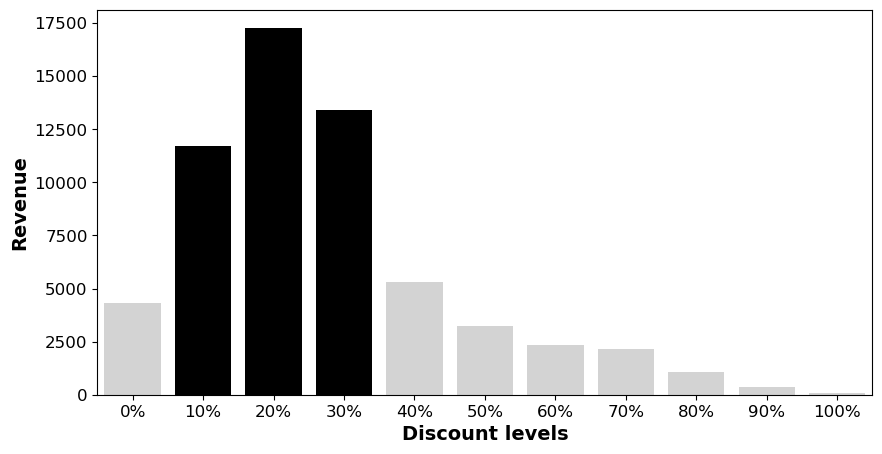

In [261]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot
sns.barplot(data=quantiles_df, x='quantiles', y='product_quantity', ax=ax)

# Highlight the second, third, and fourth bars in black
bars = ax.patches
bars[1].set_facecolor('black')  # Second bar
bars[2].set_facecolor('black')  # Third bar
bars[3].set_facecolor('black')  # Fourth bar

# Set colors for the specified bars
for i in [0, 4, 5, 6, 7, 8, 9, 10]:  # Bars to be set to light gray
    bars[i].set_facecolor('lightgray')

# Modify individual font size of elements
plt.xlabel('Discount levels', fontsize=14, weight='bold')
plt.ylabel('Revenue', fontsize=14, weight='bold')  # Changed 'Sales' to 'Revenue'
plt.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(10))

# Show the plot
plt.show()

## Discounts and revenue over time

In [262]:
agg_rev_prod_disc = orderlines_new_df.groupby([orderlines_new_df["date"].dt.to_period('W').dt.to_timestamp()]).agg({'discounts':'mean','product_quantity':'sum','revenue':'sum','id_order':'nunique'})

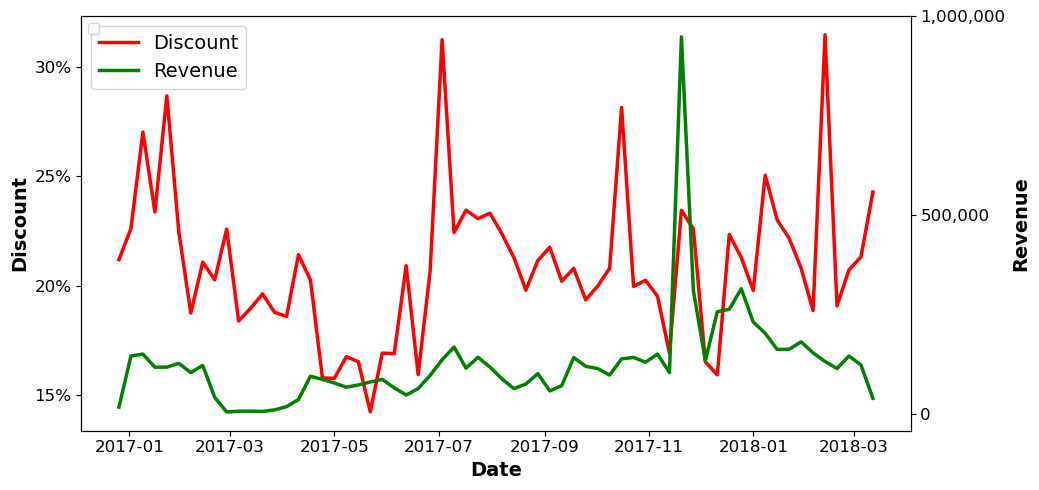

In [263]:
fig, ax1 = plt.subplots(figsize=(10.5, 5))
ax2 = ax1.twinx()

# Line plot for revenue (green color)
revenue_line = sns.lineplot(data=agg_rev_prod_disc, x='date', y='revenue', ax=ax2, color='green', linewidth=2.5)

# Line plot for discount (red color)
discount_line = sns.lineplot(data=agg_rev_prod_disc, x='date', y='discounts', ax=ax1, color='red', linewidth=2.5)

# Add legends with the same style as discount
ax1.legend([discount_line.lines[0], revenue_line.lines[0]], ['Discount', 'Revenue'], fontsize=14)

# Set common labels
ax1.set_yticks(np.arange(0.15, 0.35, step=0.05))
ax2.set_yticks(np.arange(0, 1200000, step=500000))
ax1.set_ylabel('Discount', fontsize=14, weight='bold')
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)
ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)

ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()], fontsize=12)
ax2.set_ylabel('Revenue', fontsize=14, weight='bold')
ax1.set_xlabel('Date', fontsize=14, weight='bold')

# Set y-axis labels to percentages
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Add a legend for the entire plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()



## Discounts and revenue by category

In [264]:
agg_main_category = (
    orderlines_new_df.groupby('main_category').
    agg({'revenue': ['sum', 'mean', 'std'], 
         'unit_price': ['min', 'max', 'mean', 'std'],
         'discounts': ['min','max','mean','std']}))

agg_main_category.reset_index(inplace = True)

agg_main_category.columns = ["_".join(pair) for pair in agg_main_category.columns]

In [265]:
orderlines_new_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,price_dots,mean_price,price_valid,...,desc,price,promo_price,in_stock,type,revenue,discounts,discount_lvl,main_category,quantiles
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,1,49.037939,True,...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,47.49,0.221348,low,drive,0.3
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,1,49.037939,True,...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,47.49,0.221348,low,drive,0.3


In [266]:
agg_main_category.head(2)

,main_category_,revenue_sum,revenue_mean,revenue_std,unit_price_min,unit_price_max,unit_price_mean,unit_price_std,discounts_min,discounts_max,discounts_mean,discounts_std
0,accessories,1563113.68,133.59946,205.034425,1.60,999.00,120.856826,153.823709,0.0,0.977127,0.231725,0.184303
1,adaptor,295355.80,50.75714,75.228734,3.39,983.75,46.028816,67.025734,0.0,0.895862,0.264905,0.191190


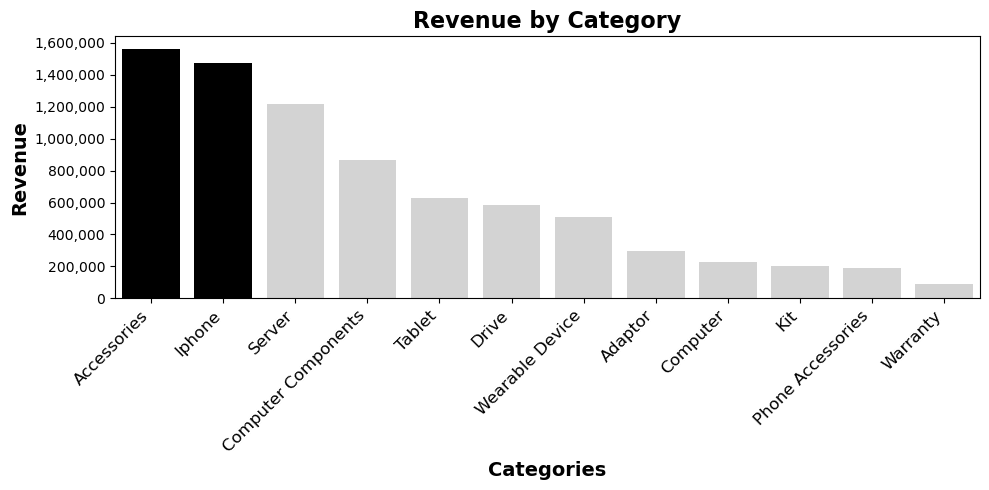

In [267]:
fig, ax1 = plt.subplots(figsize=(10, 5))
num_categories = len(agg_main_category)
color_palette = sns.color_palette("Set1", num_categories)

sns.barplot(data=agg_main_category.sort_values(by='revenue_sum', ascending=False),
            x='main_category_',
            y='revenue_sum',
            palette=color_palette,  # Use the same color palette
            ax=ax1)

# Set colors for the specified bars
bars = ax1.patches
bars[0].set_facecolor('black')  # First bar
bars[1].set_facecolor('black')  # Second bar
for i in range(2, 12):  # Bars 3 to 12
    bars[i].set_facecolor('lightgray')

ax1.set_xticklabels(labels=agg_main_category.sort_values(by='revenue_sum', ascending=False).main_category_.str.replace('_', ' ').str.title(), fontsize=12, rotation=45, ha='right')
ax1.set_yticklabels(['{:,}'.format(int(y)) for y in ax1.get_yticks().tolist()])
ax1.set_xlabel('Categories', fontsize=14, weight='bold')
ax1.set_ylabel('Revenue', fontsize=14, weight='bold')
ax1.set_title('Revenue by Category', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()






In [268]:
agg_main_category.head(2)

,main_category_,revenue_sum,revenue_mean,revenue_std,unit_price_min,unit_price_max,unit_price_mean,unit_price_std,discounts_min,discounts_max,discounts_mean,discounts_std
0,accessories,1563113.68,133.59946,205.034425,1.60,999.00,120.856826,153.823709,0.0,0.977127,0.231725,0.184303
1,adaptor,295355.80,50.75714,75.228734,3.39,983.75,46.028816,67.025734,0.0,0.895862,0.264905,0.191190


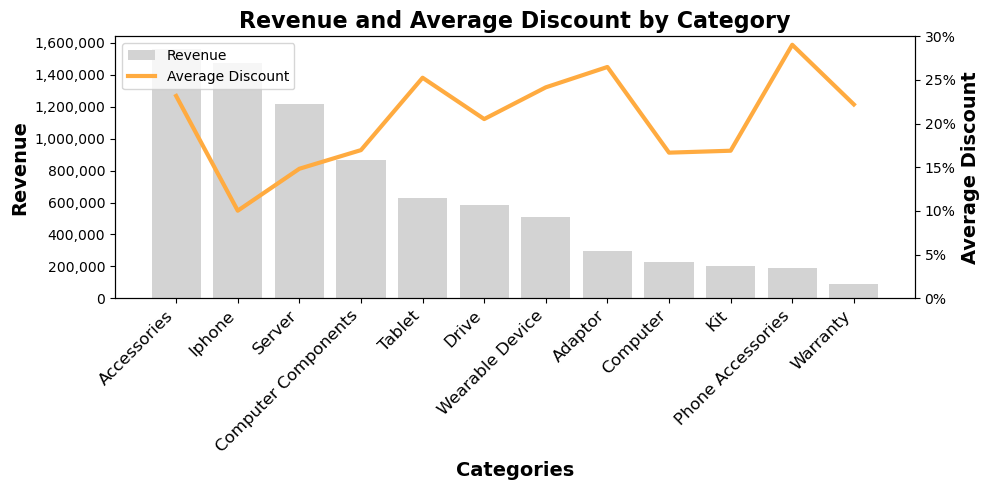

In [269]:
fig, ax1 = plt.subplots(figsize=(10, 5))
# Bar plot for revenue
num_categories = len(agg_main_category)
color_palette = sns.color_palette("Set1", num_categories)

sns.barplot(data=agg_main_category.sort_values(by='revenue_sum', ascending=False),
            x='main_category_',
            y='revenue_sum',
            palette=['lightgray'] * num_categories,  # All bars set to light gray
            ax=ax1,
            label='Revenue')

ax1.set_xticklabels(labels=agg_main_category.sort_values(by='revenue_sum', ascending=False).main_category_.str.replace('_', ' ').str.title(), fontsize=12, rotation=45, ha='right')
ax1.set_yticklabels(['{:,}'.format(int(y)) for y in ax1.get_yticks().tolist()])
ax1.set_xlabel('Categories', fontsize=14, weight='bold')
ax1.set_ylabel('Revenue', fontsize=14, weight='bold')
ax1.set_title('Revenue and Average Discount by Category', fontsize=16, weight='bold')

# Line plot for average discount
ax2 = ax1.twinx()  # Create a twin axes sharing the same x-axis
sns.lineplot(data=agg_main_category.sort_values(by='revenue_sum', ascending=False),
             y='discounts_mean',
             x='main_category_',  # Use the same x-axis as the bar plot
             color='#ffab40',
             linewidth=3,
             ax=ax2,
             label='Average Discount')

ax2.set_ylabel('Average Discount', fontsize=14, weight='bold')
ax2.set_ylim(0, 0.3)  # Start the y-axis from zero
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()


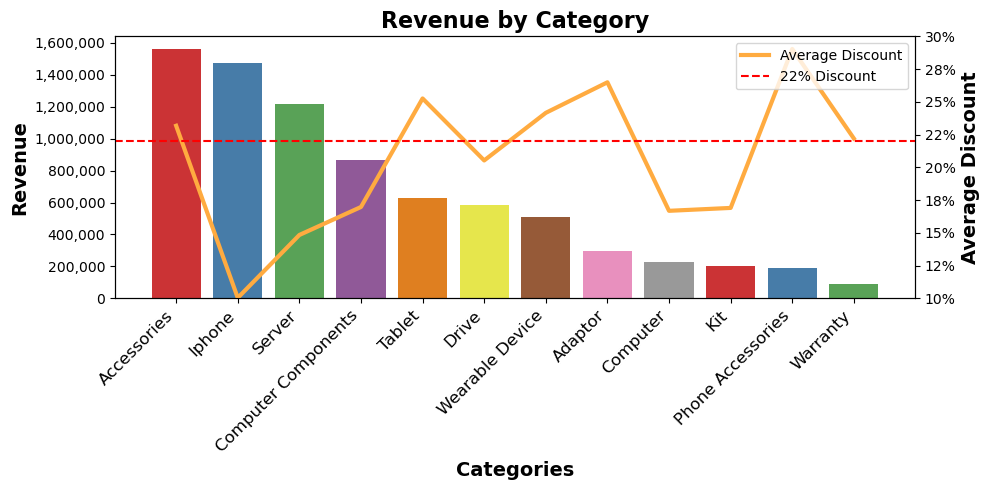

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for revenue
num_categories = len(agg_main_category)
color_palette = sns.color_palette("Set1", num_categories)

sns.barplot(data=agg_main_category.sort_values(by='revenue_sum', ascending=False),
            x='main_category_',
            y='revenue_sum',
            palette=color_palette,
            ax=ax1)

ax1.set_xticklabels(labels=agg_main_category.sort_values(by='revenue_sum', ascending=False).main_category_.str.replace('_', ' ').str.title(), fontsize=12, rotation=45, ha='right')
ax1.set_yticklabels(['{:,}'.format(int(y)) for y in ax1.get_yticks().tolist()])
ax1.set_xlabel('Categories', fontsize=14, weight='bold')
ax1.set_ylabel('Revenue', fontsize=14, weight='bold')
ax1.set_title('Revenue by Category', fontsize=16, weight='bold')

# Line plot for average discount
ax2 = ax1.twinx()  # Create a twin axes sharing the same x-axis
sns.lineplot(data=agg_main_category.sort_values(by='revenue_sum', ascending=False),
             y='discounts_mean',
             x='main_category_',  # Use the same x-axis as the bar plot
             color='#ffab40',
             linewidth=3,
             ax=ax2,
             label='Average Discount')

# Add a horizontal line for the 22% discount
ax2.axhline(y=0.22, color='red', linestyle='--', label='22% Discount')
ax2.set_ylabel('Average Discount', fontsize=14, weight='bold')
ax2.set_ylim(0.1, 0.3)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


## Prices by category

In [271]:
orderlines_new_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,price_dots,mean_price,price_valid,...,desc,price,promo_price,in_stock,type,revenue,discounts,discount_lvl,main_category,quantiles
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,1,49.037939,True,...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,47.49,0.221348,low,drive,0.3
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,1,49.037939,True,...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,47.49,0.221348,low,drive,0.3


In [272]:
agg_main_category

,main_category_,revenue_sum,revenue_mean,revenue_std,unit_price_min,unit_price_max,unit_price_mean,unit_price_std,discounts_min,discounts_max,discounts_mean,discounts_std
0,accessories,1563113.68,133.599460,205.034425,1.60,999.00,120.856826,153.823709,0.0,0.977127,0.231725,0.184303
1,adaptor,295355.80,50.757140,75.228734,3.39,983.75,46.028816,67.025734,0.0,0.895862,0.264905,0.191190
2,computer,226779.46,862.279316,292.453903,318.99,999.00,821.696122,166.269445,0.0,0.733953,0.166786,0.124972
3,computer_components,866990.85,147.272100,147.625975,5.49,937.99,114.388240,81.394103,0.0,0.908217,0.169708,0.099290
4,drive,581769.68,134.326871,194.782638,1.00,806.58,118.437476,123.791647,0.0,0.962949,0.205247,0.143760
5,iPhone,1475270.39,575.154148,261.296512,25.99,999.00,555.217119,206.828185,0.0,0.568009,0.100326,0.093867
6,kit,201234.10,86.218552,109.602392,2.47,750.58,83.966774,105.391318,0.0,0.646638,0.168997,0.161418
7,phone_accessories,192280.94,29.168832,29.117925,2.99,299.99,27.790137,24.595362,0.0,0.876292,0.290342,0.212346
8,server,1218071.93,241.154609,198.621825,6.64,999.99,231.065458,188.471484,0.0,0.663181,0.148342,0.114290
9,tablet,629190.78,177.486821,242.904246,4.29,999.17,170.198513,225.847599,0.0,0.833611,0.252571,0.215061


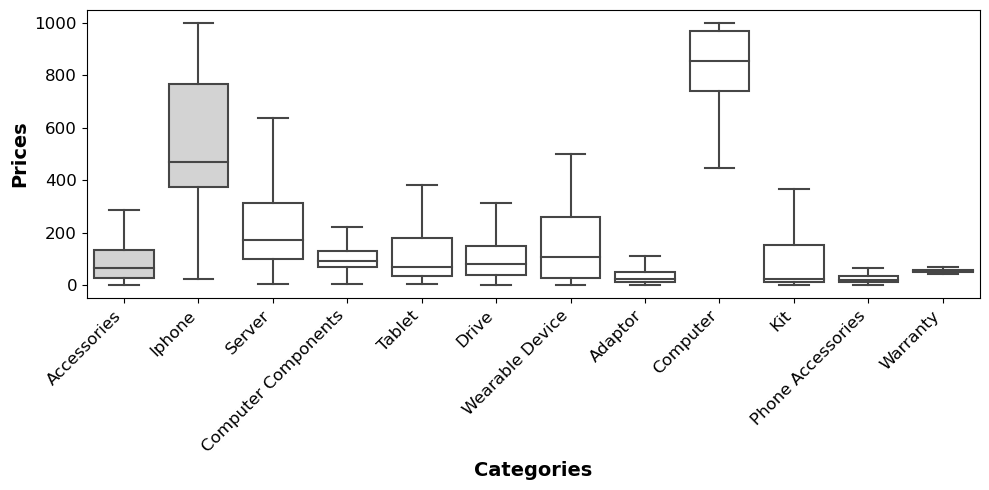

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data and aggregation ready
# orderlines_new_df
# agg_main_category

fig, ax1 = plt.subplots(figsize=(10, 5))
num_categories = len(agg_main_category)
color_palette = sns.color_palette("Set1", num_categories)

# Create a boxplot with default settings
box = sns.boxplot(data=orderlines_new_df,
            x='main_category',  # Categories on the x-axis
            y='unit_price',      # Prices on the y-axis
            order=agg_main_category.sort_values(by='revenue_sum', ascending=False).main_category_,
            showfliers=False,
            ax=ax1)

# Set color inside the boxplot to white for all boxes
for i, patch in enumerate(box.patches):
    if i < 2:  # Set light gray color inside the box for the first and second boxes
        patch.set_facecolor('lightgray')
    else:
        patch.set_facecolor('white')

# Set labels and tick labels
ax1.set_xlabel('Categories', fontsize=14, weight='bold')
ax1.set_ylabel('Prices', fontsize=14, weight='bold')
ax1.set_xticklabels(labels=agg_main_category.sort_values(by='revenue_sum', ascending=False).main_category_.str.replace('_', ' ').str.title(), fontsize=12, rotation=45, ha='right')
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)

plt.tight_layout()
plt.show()
